### Helpers Functions


In [ ]:
import numpy as np
import sympy as sp

def check_convexity(func, variables):
    gradient = [sp.diff(func, var) for var in variables]
    hessian = [[sp.diff(g, var) for var in variables] for g in gradient]
    
    return gradient, hessian
    
def is_positive_semidefinite(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.all(eigenvalues  >= -1e-10)

### Question 1
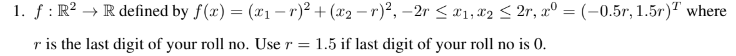

In [ ]:
def get_last_digit(roll_number):
    return int(roll_number[-1])

def define_function(r):
    x1, x2 = sp.symbols('x1 x2')
    return (x1 - r)**2 + (x2 - r)**2

# Your roll number
roll_number = "B21CS098"

# Get the last digit
r = get_last_digit(roll_number)
print(f"Last digit of roll number: {r}")

# Define the function
x1, x2 = sp.symbols('x1 x2')
f = define_function(r)
print(f"Function f(x) = {f}")

# Check convexity
gradient, hessian = check_convexity(f, (x1, x2))

print("Gradient:")
print(gradient)

print("\nHessian:")
print(hessian)

# Evaluate at x⁰ = (-0.5r, 1.5r)ᵀ
x0 = [-0.5*r, 1.5*r]
hessian_func = sp.lambdify((x1, x2), hessian, 'numpy')
hessian_at_x0 = hessian_func(*x0)

print("\nHessian at x⁰:")
print(hessian_at_x0)

# Check if the Hessian is positive semidefinite
is_convex = is_positive_semidefinite(hessian_at_x0)

print(f"\nIs the function convex? {is_convex}")

# Check the domain constraint
print(f"\nDomain constraint: -2r ≤ x1, x2 ≤ 2r")
print(f"-{2*r} ≤ x1, x2 ≤ {2*r}")

### Question 2
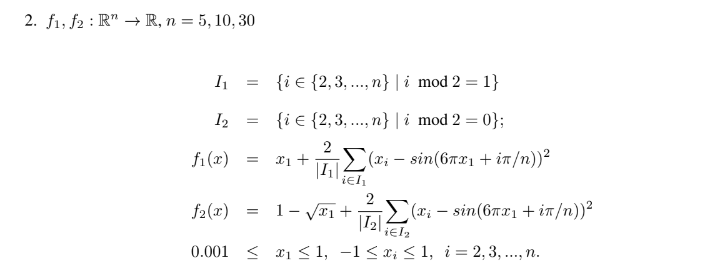

In [ ]:
def define_f2(n):
    # Define symbolic variables
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    # Define I2
    I2 = [i for i in range(2, n+1) if i % 2 == 0]
    
    # Define the function f2
    f2 = 1 - sp.sqrt(x[0])  # x1 is x[0] in zero-based indexing
    f2 += (2 / len(I2)) * sum((x[i-1] - sp.sin(6*sp.pi*x[0] + i*sp.pi/n))**2 for i in I2)
    
    return f2, x

# Check convexity for n = 5, 10, 30
for n in [5, 10, 30]:
    print(f"\nChecking convexity for n = {n}")
    f2, x = define_f2(n)

    # print(f"Given function is: {f2}")  
    print(f"Function f2(x) = {f2}")
    print(f"Symbolic variables: {x}")
    gradient, hessian = check_convexity(f2, x)
    
    print(f"Gradient shape: {len(gradient)}")
    print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")
    
    # Generate a random point in the domain
    x0 = np.random.uniform(low=[0.001] + [-1]*(n-1), high=[1]*n)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(x, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is the function convex at the random point? {is_convex}")

print("\nDomain constraints:")
print("0.001 ≤ x1 ≤ 1")
print("-1 ≤ xi ≤ 1, for i = 2, 3, ..., n")

### Question 3
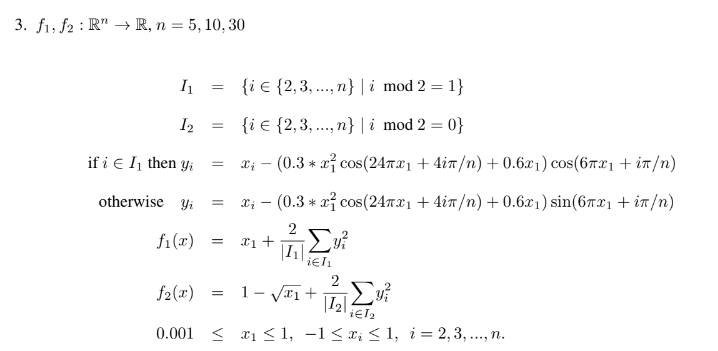

In [ ]:
def define_f2(n):
    # Define symbolic variables
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    # Define I2
    I2 = [i for i in range(2, n+1) if i % 2 == 0]

    y={}
    for i in I2:
        y[i] = (x[i-1] - (0.3 * x[0]**2 * sp.cos(24*sp.pi*x[0] + 4*i*sp.pi/n) + 0.6*x[0]) * 
                sp.sin(6*sp.pi*x[0] + i*sp.pi/n))
    
    # Define the function f2
    f2 = 1 - sp.sqrt(x[0])  # x1 is x[0] in zero-based indexing
    f2 += (2 / len(I2)) * sum(y[i]**2 for i in I2)
    
    return f2, x


# Check convexity for n = 5, 10, 30
for n in [5, 10, 30]:
    print(f"\nChecking convexity for n = {n}")
    f2, x = define_f2(n)

    # print(f"Given function is: {f2}")  
    print(f"Function f2(x) = {f2}")
    print(f"Symbolic variables: {x}")
    gradient, hessian = check_convexity(f2, x)
    
    print(f"Gradient shape: {len(gradient)}")
    print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")
    
    # Generate a random point in the domain
    x0 = np.random.uniform(low=[0.001] + [-1]*(n-1), high=[1]*n)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(x, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is the function convex at the random point? {is_convex}")

print("\nDomain constraints:")
print("0.001 ≤ x1 ≤ 1")
print("-1 ≤ xi ≤ 1, for i = 2, 3, ..., n")


### Question 4
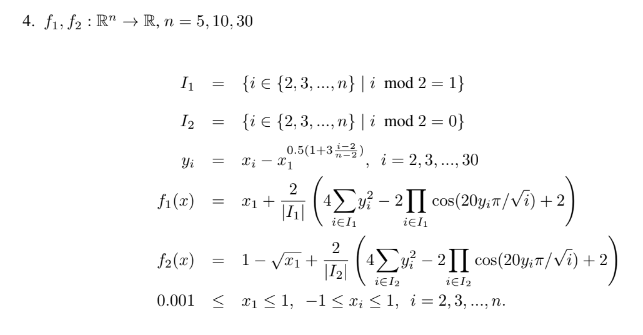

In [ ]:
def define_f2(n):
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    I2 = [i for i in range(2, n+1) if i % 2 == 0]

    y = {i: x[i-1] - x[0]**(0.5*(1+3*(i-2)/(n-2))) for i in range(2, n+1)}
    
    # Define the function f2
    f2 = 1 - sp.sqrt(x[0])  # x1 is x[0] in zero-based indexing
    
    # Calculate the sum of y[i]^2
    sum_y_squared = sum(y[i]**2 for i in I2)
    
    # Calculate the product of cosines
    prod_cos = sp.prod(sp.cos(20*y[i]*sp.pi/sp.sqrt(i)) for i in I2)
    
    # Complete f2 definition
    f2 += (2 / len(I2)) * (4 * sum_y_squared - 2 * prod_cos + 2)
    
    return f2, x


# Check convexity for n = 5, 10, 30
for n in [5, 10, 30]:
    print(f"\nChecking convexity for n = {n}")
    f2, x = define_f2(n)

    # print(f"Given function is: {f2}")  
    print(f"Function f2(x) = {f2}")
    print(f"Symbolic variables: {x}")
    gradient, hessian = check_convexity(f2, x)
    
    print(f"Gradient shape: {len(gradient)}")
    print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")
    
    # Generate a random point in the domain
    x0 = np.random.uniform(low=[0.001] + [-1]*(n-1), high=[1]*n)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(x, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is the function convex at the random point? {is_convex}")

print("\nDomain constraints:")
print("0.001 ≤ x1 ≤ 1")
print("-1 ≤ xi ≤ 1, for i = 2, 3, ..., n")

### Question 5
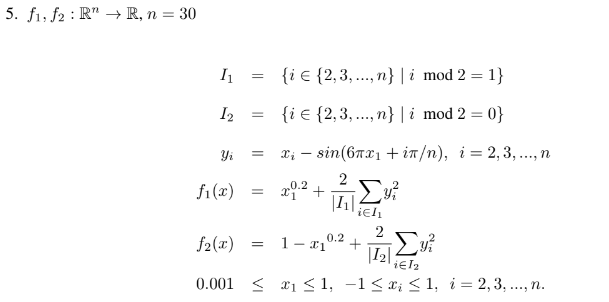

In [ ]:
def define_f2(n):
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    I2 = [i for i in range(2, n+1) if i % 2 == 0]

    y = {i: x[i-1] - sp.sin(6*sp.pi*x[0]+(i*sp.pi)/n) for i in range(2, n+1)}
    
    # Define the function f2
    f2 = 1 - x[0]**0.2  # x1 is x[0] in zero-based indexing
    
    # Calculate the sum of y[i]^2
    sum_y_squared = sum(y[i]**2 for i in I2)
    
    # Complete f2 definition
    f2 += (2 / len(I2)) * (sum_y_squared)
    
    return f2, x

# Check convexity for n = 30
for n in [30]:
    print(f"\nChecking convexity for n = {n}")
    f2, x = define_f2(n)

    # print(f"Given function is: {f2}")  
    print(f"Function f2(x) = {f2}")
    print(f"Symbolic variables: {x}")
    gradient, hessian = check_convexity(f2, x)
    
    print(f"Gradient shape: {len(gradient)}")
    print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")
    
    # Generate a random point in the domain
    x0 = np.random.uniform(low=[0.001] + [-1]*(n-1), high=[1]*n)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(x, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is the function convex at the random point? {is_convex}")

print("\nDomain constraints:")
print("0.001 ≤ x1 ≤ 1")
print("-1 ≤ xi ≤ 1, for i = 2, 3, ..., n")

### Question 6
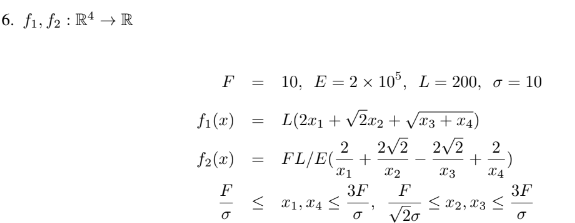

In [ ]:
F = 10
E = 2 * 10**5
L = 200
sigma = 10

def define_f2():
    x1, x2, x3, x4 = sp.symbols('x1 x2 x3 x4')
    f2 = F*L/E * (2/x1 + 2*sp.sqrt(2)/x2 - 2*sp.sqrt(2)/x3 + 2/x4)
    return f2, (x1, x2, x3, x4)
  
f2, variables = define_f2()
print("f2(x) =", f2)

gradient, hessian = check_convexity(f2, variables)
print("Gradient:", gradient)
print("Hessian:", hessian)


x1_min, x4_max = F/sigma, 3*F/sigma
x2_min, x3_max = F/(sp.sqrt(2)*sigma), 3*F/sigma

x0 = [
    np.random.uniform(x1_min, x4_max),
    np.random.uniform(x2_min, x3_max),
    np.random.uniform(x2_min, x3_max),
    np.random.uniform(x1_min, x4_max)
]

hessian_func = sp.lambdify(variables, hessian, 'numpy')
hessian_at_x0 = hessian_func(*x0)
print("Hessian at x0:", hessian_at_x0)

is_convex = is_positive_semidefinite(hessian_at_x0)
print("Is the function convex at the random point?", is_convex)

print("\nDomain constraints:")
print(f"{F/sigma} ≤ x1, x4 ≤ {3*F/sigma}")
print(f"{F/(np.sqrt(2)*sigma)} ≤ x2, x3 ≤ {3*F/sigma}")

### Question 7
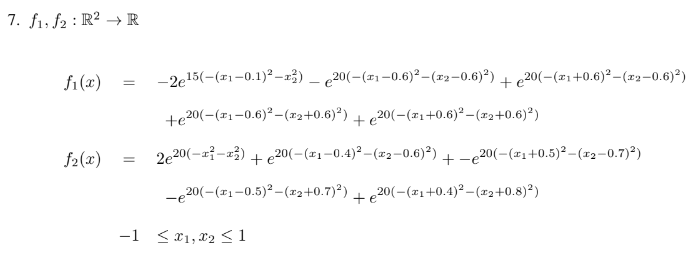

In [ ]:
def define_f2():
    x1,x2=sp.symbols('x1 x2')
    
    f2 = (
        2 * sp.exp(20 * (-(x1**2) - (x2**2))) +
        sp.exp(20 * (-(x1 - 0.4)**2 - (x2 - 0.6)**2)) +
        sp.exp(20 * (-(x1 + 0.5)**2 - (x2 - 0.7)**2)) -
        sp.exp(20 * (-(x1 - 0.5)**2 - (x2 + 0.7)**2)) +
        sp.exp(20 * (-(x1 + 0.4)**2 - (x2 + 0.8)**2))
    )

    return f2, (x1, x2)

f2, variables = define_f2()
print("f2(x) =", f2)

gradient, hessian = check_convexity(f2, variables)
print("Gradient:", gradient)
print("Hessian:", hessian)

x1_min,x2_max=-1,1

x0=[
    np.random.uniform(x1_min,x2_max),
    np.random.uniform(x1_min,x2_max)
]

hessian_func = sp.lambdify(variables, hessian, 'numpy')
hessian_at_x0 = hessian_func(*x0)
print("Hessian at x0:", hessian_at_x0)

is_convex = is_positive_semidefinite(hessian_at_x0)
print("Is the function convex at the random point?", is_convex)

print("\nDomain constraints:")
print(f"{x1_min} ≤ x1, x2 ≤ {x2_max}")


### Question 8
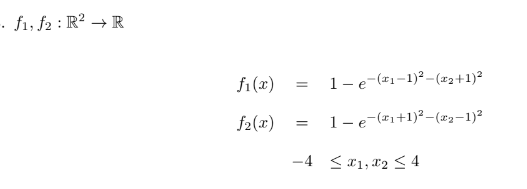

In [ ]:
def define_f2():
    x1,x2=sp.symbols('x1 x2')

    f2= 1 - sp.exp(-1*(x1+1)**2 - (x2-1)**2)
    return f2, (x1, x2)

f2, variables = define_f2()
print("f2(x) =", f2)

gradient, hessian = check_convexity(f2, variables)
print("Gradient:", gradient)
print("Hessian:", hessian)

x1_min,x2_max=-4,4

x0=[
    np.random.uniform(x1_min,x2_max),
    np.random.uniform(x1_min,x2_max)
]

hessian_func = sp.lambdify(variables, hessian, "numpy")
hessian_at_x0 = hessian_func(*x0)
print("Hessian at x0:", hessian_at_x0)

is_convex = is_positive_semidefinite(hessian_at_x0)
print("Is the function convex at the random point?", is_convex)

print("\nDomain constraints:")
print(f"{x1_min} ≤ x1, x2 ≤ {x2_max}")

### Question 9
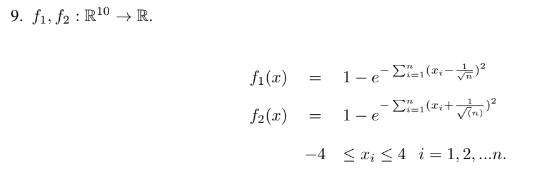

In [ ]:
def define_f2(n):
    x = sp.symbols(f'x1:{n+1}')

    inner_sum = sum((x[i] + 1/sp.sqrt(n))**2 for i in range(n))
    f2 = 1 - sp.exp(-inner_sum)

    return f2, x

n = 10 # for assumption
f2, variables = define_f2(n)
print(f"f2(x) = {f2}")

gradient, hessian = check_convexity(f2, variables)
print("Gradient:", gradient)
print("Hessian:", hessian)

x_min,x_max=-4,4  

x0 = [np.random.uniform(x_min, x_max) for _ in range(n)]

hessian_func = sp.lambdify(variables, hessian, "numpy")
hessian_at_x0 = hessian_func(*x0)
print("Hessian at x0:", hessian_at_x0)

is_convex = is_positive_semidefinite(hessian_at_x0)
print("Is the function convex at the random point?", is_convex)

print("\nDomain constraints:")
print(f"{x_min} ≤ x1, x2, ..., x{n} ≤ {x_max,x_min}")

#### From now I have only solve for f3 function as my roll number is B21CS098 so its last two didit roll number is 98 and 98%3==2 so I have to solve only for f3.

### Question 10
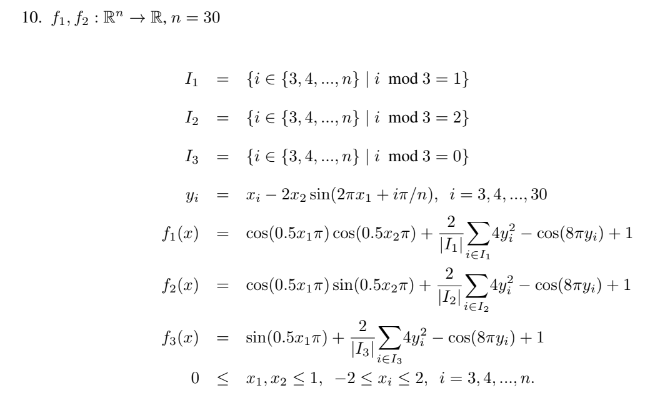

In [ ]:
def define_f3(n):
    # Define symbolic variables
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    # Define I3
    I3 = [i for i in range(3, n+1) if i % 3 == 0]

    y = {i: x[i-1] - 2*x[1]*sp.sin(2*sp.pi*x[0] + i*sp.pi/n) for i in range(3, n+1)}
    
    # Define the function f3
    f3 = sp.sin(0.5*x[0]*sp.pi)
    f3 += (2*4 / len(I3)) * sum(y[i]**2 for i in I3)
    f3 += sp.cos(8*sp.pi*y[3]) + 1
    
    return f3, x



for n in [30]:
    print(f"\nChecking convexity for n = {n}")
    f3, x = define_f3(n)

    # print(f"Given function is: {f2}")  
    print(f"Function f3(x) = {f3}")
    print(f"Symbolic variables: {x}")
    gradient, hessian = check_convexity(f3, x)
    
    print(f"Gradient shape: {len(gradient)}")
    print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")
    
    # Generate a random point in the domain
    x0 = np.random.uniform(low=[0, 0] + [2]*(len(x)-2), high=[1, 1] + [2]*(len(x)-2))
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(x, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is the function convex at the random point? {is_convex}")


print("\nDomain constraints:")
print("0 ≤ x1, x2 ≤ 1")
print("2 ≤ xi ≤ 2, for i = 3, 4, ..., n")

### Question 11
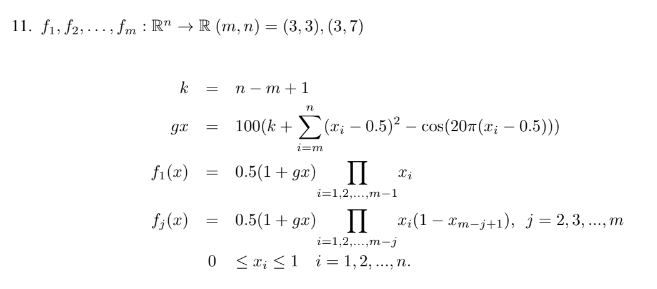

In [ ]:
def define_functions(n, m):
    # Define symbolic variables
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    # Define k and gx
    k = n - m + 1
    gx = 100 * (k + sum((xi - 0.5)**2 * sp.cos(20*sp.pi*(xi - 0.5)) for xi in x))
    
    # Define f1 to fm
    functions = []
    for j in range(1, m+1):
        if j == 1:
            fj = 0.5 * (1 + gx) * sp.prod(x)
        else:
            fj = 0.5 * (1 + gx) * sp.prod(x[i-1] for i in range(1, n-j+3))
            if j==3:
                functions.append(fj)
                break
    
    return functions, x

for n, m in [(3, 3), (3, 7)]:
    print(f"\nChecking for (n, m) = ({n}, {m})")
    functions, variables = define_functions(n, m)
    
    for j, fj in enumerate(functions, 1):
        print(f"\nf{j}(x) = {fj}")
        
        gradient, hessian = check_convexity(fj, variables)
        
        print(f"Gradient shape: {len(gradient)}")
        print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")
        
        # Generate a random point in the domain
        x0 = np.random.uniform(low=0, high=1, size=n)
        
        # Evaluate Hessian at x0
        hessian_func = sp.lambdify(variables, hessian, 'numpy')
        hessian_at_x0 = hessian_func(*x0)
        
        is_convex = is_positive_semidefinite(hessian_at_x0)
        print(f"Is f{j} convex at the random point? {is_convex}")

print("\nDomain constraint:")
print("0 ≤ xi ≤ 1, for i = 1, 2, ..., n")

### Question 12
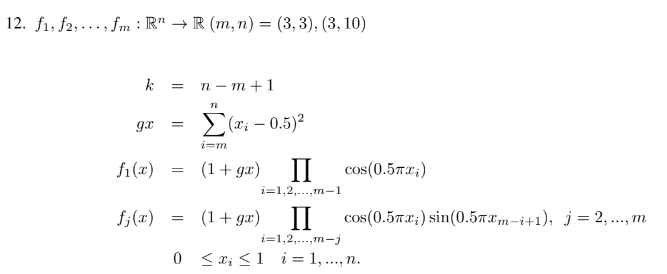

In [ ]:
def define_functions(n, m):
    # Define symbolic variables
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    # Define k and gx
    k = n - m + 1
    gx =  sum((xi - 0.5)**2 for xi in x)
    
    # Define f1 to fm
    functions = []
    for j in range(1, m+1):
        if j == 1:
            fj =  (1 + gx) * sp.prod(x)
        else:
            if j==3:
                fj = 0.5 * (1 + gx) * sp.prod(x[i-1] for i in range(1, n-j+3))
                functions.append(fj)
                break
    
    return functions, x

for n, m in [(3, 3), (3, 7)]:
    print(f"\nChecking for (n, m) = ({n}, {m})")
    functions, variables = define_functions(n, m)
    
    for j, fj in enumerate(functions, 1):
        print(f"\nf{j}(x) = {fj}")
        
        gradient, hessian = check_convexity(fj, variables)
        
        print(f"Gradient shape: {len(gradient)}")
        print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")
        
        # Generate a random point in the domain
        x0 = np.random.uniform(low=0, high=1, size=n)
        
        # Evaluate Hessian at x0
        hessian_func = sp.lambdify(variables, hessian, 'numpy')
        hessian_at_x0 = hessian_func(*x0)
        
        is_convex = is_positive_semidefinite(hessian_at_x0)
        print(f"Is f{j} convex at the random point? {is_convex}")

print("\nDomain constraint:")
print("0 ≤ xi ≤ 1, for i = 1, 2, ..., n")

#### Question 13
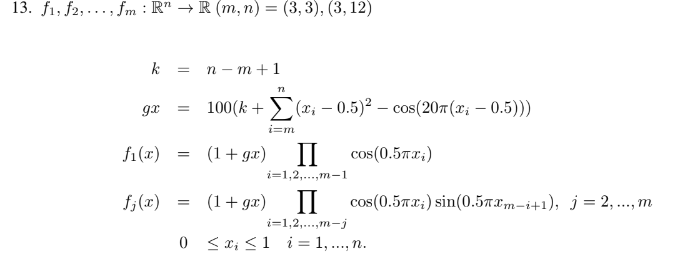


In [ ]:
def define_f3(m, n):
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    k = n - m + 1
    gx = 100 * (k + sum((xi - 0.5)**2 - sp.cos(20*sp.pi*(xi - 0.5)) for xi in x[m-1:]))
    f3 = (1 + gx) * sp.prod(sp.cos(0.5*sp.pi*xi) for xi in x[:m-3]) * sp.sin(0.5*sp.pi*x[m-3])
    return f3, x

# Check for (m, n) = (3, 12)
m, n = 3, 12
print(f"\nAnalyzing f3 for (m, n) = ({m}, {n})")

f3, variables = define_f3(m, n)
print(f"\nf3(x) = {f3}")

gradient, hessian = check_convexity(f3, variables)

print(f"Gradient shape: {len(gradient)}")
print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")

# Generate random points in the domain
num_points = 5
for i in range(num_points):
    x0 = np.random.uniform(low=0, high=1, size=n)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(variables, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is f3 convex at random point {i+1}? {is_convex}")

print("\nDomain constraint:")
print("0 ≤ xi ≤ 1, for i = 1, ..., 12")

#### Question 14
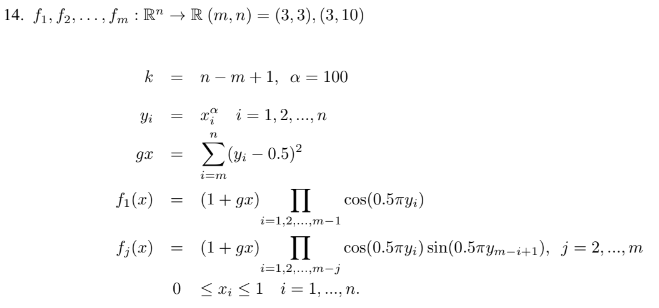

In [ ]:
def define_f3(m, n):
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    k = n - m + 1
    alpha = 100
    y = [xi**alpha for xi in x]
    gx = sum((yi - 0.5)**2 for yi in y[m-1:])
    f3 = (1 + gx) * sp.prod(sp.cos(0.5*sp.pi*yi) for yi in y[:m-3]) * sp.sin(0.5*sp.pi*y[m-3])
    
    return f3, x


m, n = 3, 10
print(f"\nAnalyzing f3 for (m, n) = ({m}, {n})")

f3, variables = define_f3(m, n)
print(f"\nf3(x) = {f3}")

gradient, hessian = check_convexity(f3, variables)

print(f"Gradient shape: {len(gradient)}")
print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")

# Generate random points in the domain
num_points = 5
for i in range(num_points):
    x0 = np.random.uniform(low=0, high=1, size=n)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(variables, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is f3 convex at random point {i+1}? {is_convex}")

print("\nDomain constraint:")
print("0 ≤ xi ≤ 1, for i = 1, ..., 10")

#### Question 15
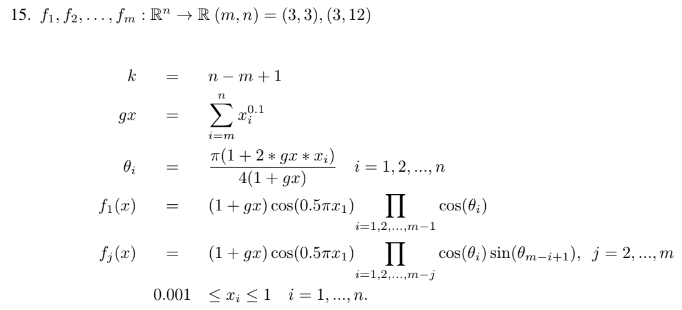

In [ ]:
def define_f3(m, n):
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    # Define k
    k = n - m + 1
    
    # Define gx
    gx = sum(xi**0.1 for xi in x[m-1:])
    
    # Define θi
    theta = [(sp.pi * (1 + 2 * gx * xi)) / (4 * (1 + gx)) for xi in x]
    
    # Define f3 (j=3)
    f3 = (1 + gx) * sp.cos(0.5*sp.pi*x[0]) * sp.prod(sp.cos(theta[i]) for i in range(1, m-3)) * sp.sin(theta[m-3])
    
    return f3, x

m, n = 3, 12
print(f"\nAnalyzing f3 for (m, n) = ({m}, {n})")

f3, variables = define_f3(m, n)
print(f"\nf3(x) = {f3}")

gradient, hessian = check_convexity(f3, variables)

print(f"Gradient shape: {len(gradient)}")
print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")

# Generate random points in the domain
num_points = 5
for i in range(num_points):
    x0 = np.random.uniform(low=0.001, high=1, size=n)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(variables, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is f3 convex at random point {i+1}? {is_convex}")

print("\nDomain constraint:")
print("0.001 ≤ xi ≤ 1, for i = 1, ..., 12")


#### Question 16
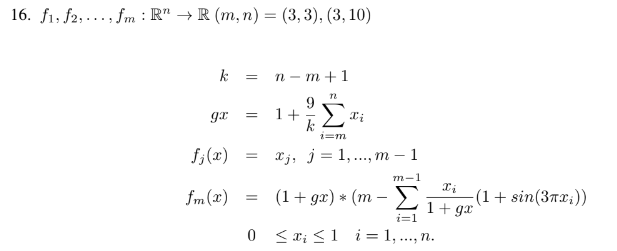

In [ ]:
def define_f3(m, n):
    # Define symbols x1, x2, ..., xn
    x = sp.symbols(' '.join([f'x{i}' for i in range(1, n+1)]))
    
    # Define k
    k = n - m + 1
    
    # Define gx
    gx = 1 + (9 / k) * sum(xi for xi in x[m-1:])
    
    # Define f3 (j=3)
    fj = x[2]  # This is x3, as j=3
    
    # Define fm (in this case, m = 3)
    sum_term = sum(xi / (1 + gx * (1 + sp.sin(3 * sp.pi * xi))) for xi in x[:m-1])
    f3 = (1 + gx) * (m - sum_term)
    
    return f3, x


m, n = 3, 10  # Use n=10 as per the problem statement

print(f"\nAnalyzing f3 for (m, n) = ({m}, {n})")

# Define the function f3
f3, variables = define_f3(m, n)
print(f"\nf3(x) = {f3}")

# Compute gradient and Hessian
gradient, hessian = check_convexity(f3, variables)

print(f"Gradient shape: {len(gradient)}")
print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")

# Generate random points in the domain
num_points = 5
for i in range(num_points):
    x0 = np.random.uniform(low=0.001, high=1, size=n)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(variables, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is f3 convex at random point {i+1}? {is_convex}")

print("\nDomain constraint:")
print("0 ≤ xi ≤ 1, for i = 1, ..., 10")

#### Question 17
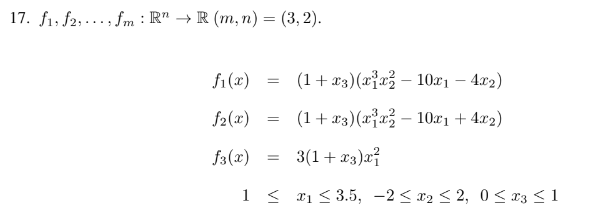

In [ ]:
def define_f3():
    # Define symbols x1, x2, x3
    x1, x2, x3 = sp.symbols('x1 x2 x3')
    
    # Define f3
    f3 = 3 * (1 + x3) * x1**2
    
    return f3, [x1, x2, x3]

f3, variables = define_f3()
print(f"\nf3(x) = {f3}")

# Compute gradient and Hessian
gradient, hessian = check_convexity(f3, variables)

print(f"Gradient shape: {len(gradient)}")
print(f"Hessian shape: {len(hessian)}x{len(hessian[0])}")

# Generate random points in the domain
num_points = 5
for i in range(num_points):
    x0 = np.random.uniform(low=[1, -2, 0], high=[3.5, 2, 1], size=3)
    
    # Evaluate Hessian at x0
    hessian_func = sp.lambdify(variables, hessian, 'numpy')
    hessian_at_x0 = hessian_func(*x0)
    
    is_convex = is_positive_semidefinite(hessian_at_x0)
    print(f"Is f3 convex at random point {i+1}? {is_convex}")

print("\nDomain constraint:")
print("1 ≤ x1 ≤ 3.5, -2 ≤ x2 ≤ 2, 0 ≤ x3 ≤ 1")